In [1]:
import numpy as np
import pandas as pd
data_dir = "../LlenguaCatalana/dades_david/"


dat1 = pd.read_csv(data_dir + "cat2011.csv", delimiter=";")
dat2 = pd.read_csv(data_dir + "cat2001.csv", delimiter=";")
dat3 = pd.read_csv(data_dir + "est2011-2.csv", delimiter=";",encoding="latin1")
dat4 = pd.read_csv(data_dir + "est2001.csv", delimiter=";",encoding="latin1")

# show loaded table:
#dat4

In [2]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data_dir = "../LlenguaCatalana/dades_david/"
comarques = gpd.read_file(data_dir + "comarq.geojson")

In [4]:
print(comarques.columns)

Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [5]:
print(dat1.columns)
print(comarques.columns)

Index(['Unnamed: 0', 'L'entén', 'El sap parlar', 'El sap llegir',
       'El sap escriure', 'No l'entén', 'Població de 2 anys i més',
       'Unnamed: 7', '% sap parlar', '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [6]:
dat1.rename(columns={'Unnamed: 0': 'nom_comar'}, inplace=True)

In [7]:
print(dat1.columns)
print(comarques.columns)

Index(['nom_comar', 'L'entén', 'El sap parlar', 'El sap llegir',
       'El sap escriure', 'No l'entén', 'Població de 2 anys i més',
       'Unnamed: 7', '% sap parlar', '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [8]:
merged = comarques.merge(dat1, on="nom_comar")

In [9]:
merged

,cartodb_id,comarca,provincia,nom_comar,sup_comar,geometry,L'entén,El sap parlar,El sap llegir,El sap escriure,No l'entén,Població de 2 anys i més,Unnamed: 7,% sap parlar,% int
0,1,30,43,Ribera d'Ebre,827.44,"MULTIPOLYGON (((0.49484 41.19658, 0.49420 41.1...",21852,19060,18807,13229,974,22826,NaN,"83,50127048",83
1,2,22,43,Montsià,734.10,"MULTIPOLYGON (((0.23415 40.77959, 0.23550 40.7...",67547,54647,56357,36302,1773,69320,NaN,"78,83294864",78
2,4,25,25,Pallars Jussà,1343.08,"MULTIPOLYGON (((0.92165 42.48490, 0.92162 42.4...",12680,11028,11052,8246,403,13083,NaN,"84,29259344",84
3,5,26,25,Pallars Sobirà,1377.92,"MULTIPOLYGON (((0.96112 42.63141, 0.96103 42.6...",7056,6255,6283,4699,79,7134,NaN,"87,67872161",87
4,6,27,25,Pla d'Urgell,305.05,"MULTIPOLYGON (((0.86595 41.72429, 0.86519 41.7...",35088,29963,30552,23031,1067,36156,NaN,"82,87144596",82
5,7,6,08,Anoia,866.38,"MULTIPOLYGON (((1.42447 41.73267, 1.42472 41.7...",111147,90395,94676,69379,4316,115462,NaN,"78,28982696",78
6,8,7,08,Bages,1092.42,"MULTIPOLYGON (((1.98584 41.92424, 1.98544 41.9...",173062,146726,151829,114435,5949,179012,NaN,"81,96433759",81
7,9,4,25,Alt Urgell,1447.50,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",20245,17547,18286,13328,360,20605,NaN,"85,158942",85
8,10,5,25,Alta Ribagorça,426.87,"MULTIPOLYGON (((0.82620 42.60515, 0.82805 42.6...",3997,3248,3377,2418,..,4032,NaN,"80,55555556",80
9,11,8,43,Baix Camp,696.93,"MULTIPOLYGON (((0.93547 41.32045, 0.93644 41.3...",176508,139197,147335,108874,9623,186131,NaN,"74,78442602",74


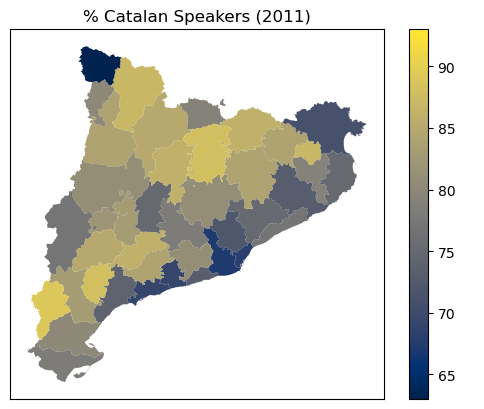

In [10]:
merged.plot(column='% int',
    cmap="cividis",
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
    vmin=63,
    vmax=93
)
plt.title('% Catalan Speakers (2011)')
plt.xticks([])  
plt.yticks([])
#plt.savefig(data_dir+'cat2011.png',bbox_inches='tight',dpi=300, transparent=False)
plt.show()

In [11]:
print(dat3.columns)

Index(['Categoria', '(1) Població', 'Població estrangera. Total',
       'Població estrangera. % vert.', 'Població estrangera. % sobre (1)',
       '% int'],
      dtype='object')


In [12]:
dat3.rename(columns={'Categoria': 'nom_comar'}, inplace=True)

In [13]:
print(dat3.columns)
print(comarques.columns)

Index(['nom_comar', '(1) Població', 'Població estrangera. Total',
       'Població estrangera. % vert.', 'Població estrangera. % sobre (1)',
       '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [14]:
merged2 = comarques.merge(dat3, on="nom_comar")
merged2

,cartodb_id,comarca,provincia,nom_comar,sup_comar,geometry,(1) Població,Població estrangera. Total,Població estrangera. % vert.,Població estrangera. % sobre (1),% int
0,1,30,43,Ribera d'Ebre,827.44,"MULTIPOLYGON (((0.49484 41.19658, 0.49420 41.1...",23889,3977,"0,34","16,65",16
1,2,22,43,Montsià,734.10,"MULTIPOLYGON (((0.23415 40.77959, 0.23550 40.7...",72261,15600,"1,32","21,59",21
2,4,25,25,Pallars Jussà,1343.08,"MULTIPOLYGON (((0.92165 42.48490, 0.92162 42.4...",14374,2108,"0,18","14,67",14
3,5,26,25,Pallars Sobirà,1377.92,"MULTIPOLYGON (((0.96112 42.63141, 0.96103 42.6...",7548,1124,"0,09","14,89",14
4,6,27,25,Pla d'Urgell,305.05,"MULTIPOLYGON (((0.86595 41.72429, 0.86519 41.7...",37265,7277,"0,61","19,53",19
5,7,6,08,Anoia,866.38,"MULTIPOLYGON (((1.42447 41.73267, 1.42472 41.7...",118509,11522,"0,97","9,72",9
6,8,7,08,Bages,1092.42,"MULTIPOLYGON (((1.98584 41.92424, 1.98544 41.9...",177032,21447,"1,81","12,11",12
7,9,4,25,Alt Urgell,1447.50,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",22008,3329,"0,28","15,13",15
8,10,5,25,Alta Ribagorça,426.87,"MULTIPOLYGON (((0.82620 42.60515, 0.82805 42.6...",4284,738,"0,06","17,23",17
9,11,8,43,Baix Camp,696.93,"MULTIPOLYGON (((0.93547 41.32045, 0.93644 41.3...",191947,36388,"3,07","18,96",18


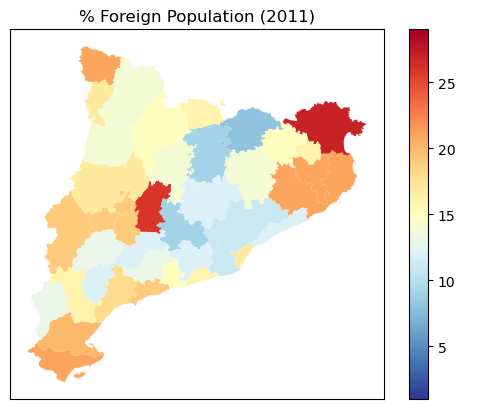

In [15]:
merged2.plot(column='% int',
    cmap="RdYlBu_r",
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
    vmin=1,
    vmax=29
);
plt.title('% Foreign Population (2011)')
plt.xticks([])  
plt.yticks([])
#plt.savefig(data_dir+'est2011.png',bbox_inches='tight',dpi=300, transparent=False)
plt.show()

In [16]:
print(dat2.columns)

Index(['Unnamed: 0', 'L'entén', 'El sap parlar', 'El sap llegir',
       'El sap escriure', 'No l'entén', 'Població de 2 anys i més',
       'Unnamed: 7', '% sap parlar', '% int'],
      dtype='object')


In [17]:
dat2.rename(columns={'Unnamed: 0': 'nom_comar'}, inplace=True)
print(dat2.columns)
print(comarques.columns)

Index(['nom_comar', 'L'entén', 'El sap parlar', 'El sap llegir',
       'El sap escriure', 'No l'entén', 'Població de 2 anys i més',
       'Unnamed: 7', '% sap parlar', '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [18]:
merged3 = comarques.merge(dat2, on="nom_comar")
merged3

,cartodb_id,comarca,provincia,nom_comar,sup_comar,geometry,L'entén,El sap parlar,El sap llegir,El sap escriure,No l'entén,Població de 2 anys i més,Unnamed: 7,% sap parlar,% int
0,1,30,43,Ribera d'Ebre,827.44,"MULTIPOLYGON (((0.49484 41.19658, 0.49420 41.1...",20928,19285,18060,12310,343,21271,NaN,"90,66334446",90
1,2,22,43,Montsià,734.10,"MULTIPOLYGON (((0.23415 40.77959, 0.23550 40.7...",54722,48674,43182,28523,1559,56281,NaN,"86,48389332",86
2,4,25,25,Pallars Jussà,1343.08,"MULTIPOLYGON (((0.92165 42.48490, 0.92162 42.4...",11494,10423,10030,7307,225,11719,NaN,"88,94103592",88
3,5,26,25,Pallars Sobirà,1377.92,"MULTIPOLYGON (((0.96112 42.63141, 0.96103 42.6...",5972,5533,5313,3763,64,6036,NaN,"91,66666667",91
4,6,27,25,Pla d'Urgell,305.05,"MULTIPOLYGON (((0.86595 41.72429, 0.86519 41.7...",28284,25648,24880,18102,736,29020,NaN,"88,38042729",88
5,7,6,08,Anoia,866.38,"MULTIPOLYGON (((1.42447 41.73267, 1.42472 41.7...",87160,71916,70400,50265,3826,90986,NaN,"79,04073154",79
6,8,7,08,Bages,1092.42,"MULTIPOLYGON (((1.98584 41.92424, 1.98544 41.9...",146061,124890,122734,91584,4875,150936,NaN,"82,74367944",82
7,9,4,25,Alt Urgell,1447.50,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",18200,16105,15234,10536,418,18618,NaN,"86,50230959",86
8,10,5,25,Alta Ribagorça,426.87,"MULTIPOLYGON (((0.82620 42.60515, 0.82805 42.6...",3352,2839,2772,1793,68,3420,NaN,"83,01169591",83
9,11,8,43,Baix Camp,696.93,"MULTIPOLYGON (((0.93547 41.32045, 0.93644 41.3...",134212,109070,107200,76164,6867,141079,NaN,"77,31129367",77


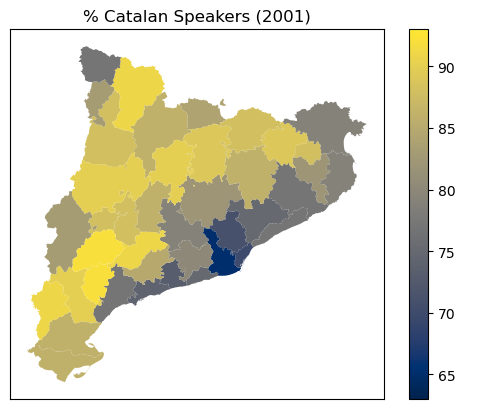

In [19]:
merged3.plot(column='% int',
#    cmap="cividis",
    cmap='cividis',
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
    vmin=63,
    vmax=93
);
plt.title('% Catalan Speakers (2001)')
plt.xticks([])  
plt.yticks([])
#plt.savefig(data_dir+'cat2001.png',bbox_inches='tight',dpi=300, transparent=False)
plt.show()

In [20]:
print(dat4.columns)

Index(['Categoria', '(1) Població', 'Població estrangera. Total',
       'Població estrangera. % vert.', 'Població estrangera. % sobre (1)',
       '% int'],
      dtype='object')


In [21]:
dat4.rename(columns={'Categoria': 'nom_comar'}, inplace=True)
print(dat4.columns)
print(comarques.columns)

Index(['nom_comar', '(1) Població', 'Població estrangera. Total',
       'Població estrangera. % vert.', 'Població estrangera. % sobre (1)',
       '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [22]:
merged4 = comarques.merge(dat4, on="nom_comar")
merged4

,cartodb_id,comarca,provincia,nom_comar,sup_comar,geometry,(1) Població,Població estrangera. Total,Població estrangera. % vert.,Població estrangera. % sobre (1),% int
0,1,30,43,Ribera d'Ebre,827.44,"MULTIPOLYGON (((0.49484 41.19658, 0.49420 41.1...",21951,447,"0,17","2,04",2
1,2,22,43,Montsià,734.10,"MULTIPOLYGON (((0.23415 40.77959, 0.23550 40.7...",57584,3084,"1,2","5,36",5
2,4,25,25,Pallars Jussà,1343.08,"MULTIPOLYGON (((0.92165 42.48490, 0.92162 42.4...",12390,285,"0,11","2,3",2
3,5,26,25,Pallars Sobirà,1377.92,"MULTIPOLYGON (((0.96112 42.63141, 0.96103 42.6...",6140,119,"0,05","1,94",1
4,6,27,25,Pla d'Urgell,305.05,"MULTIPOLYGON (((0.86595 41.72429, 0.86519 41.7...",29872,1080,"0,42","3,62",3
5,7,6,08,Anoia,866.38,"MULTIPOLYGON (((1.42447 41.73267, 1.42472 41.7...",92263,1781,"0,69","1,93",1
6,8,7,08,Bages,1092.42,"MULTIPOLYGON (((1.98584 41.92424, 1.98544 41.9...",148254,3001,"1,17","2,02",2
7,9,4,25,Alt Urgell,1447.50,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",19466,749,"0,29","3,85",3
8,10,5,25,Alta Ribagorça,426.87,"MULTIPOLYGON (((0.82620 42.60515, 0.82805 42.6...",3617,64,"0,02","1,77",1
9,11,8,43,Baix Camp,696.93,"MULTIPOLYGON (((0.93547 41.32045, 0.93644 41.3...",146522,6257,"2,43","4,27",4


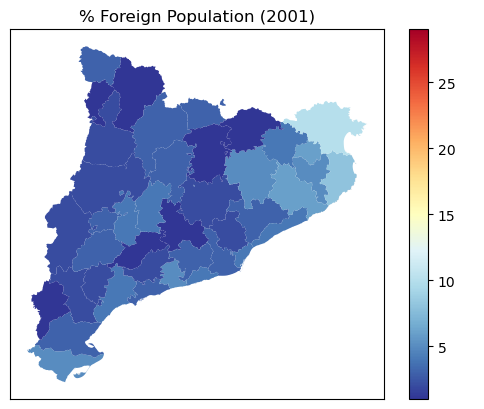

In [23]:
merged4.plot(column='% int',
    cmap="RdYlBu_r",
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
    vmin=1,
    vmax=29
);
plt.title('% Foreign Population (2001)')
plt.xticks([])  
plt.yticks([])
#plt.savefig(data_dir+'est2001.png',bbox_inches='tight',dpi=300, transparent=False)
plt.show()

In [24]:
from Scripts.Lucas.utils import make_cols_numeric
merged_p=make_cols_numeric(merged,['% sap parlar'])
merged2_p=make_cols_numeric(merged2,['Població estrangera. % sobre (1)'])

In [25]:
#x1=merged['% int']
#y1=merged2['% int']
x1=merged_p['% sap parlar']
y1=merged2_p['Població estrangera. % sobre (1)']

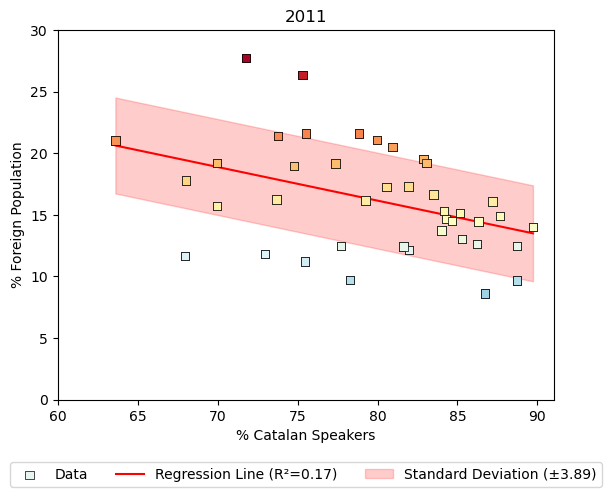

In [26]:
from scipy.stats import linregress
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)

# Compute predicted values from the regression line
y_pred = [slope * xi + intercept for xi in x1]

# Calculate the residuals (difference between observed and predicted y values)
residuals = np.array(y1) - np.array(y_pred)

# Compute the standard deviation of the residuals
std_dev = np.std(residuals)

# Create the regression line for plotting
x_line = np.linspace(min(x1), max(x1), 500)
y_line = slope * x_line + intercept

# Plot the data, regression line, and shaded area for standard deviation
plt.scatter(x1, y1, label='Data',c=y1, cmap='RdYlBu_r', marker='s',zorder=2, edgecolor='black', linewidth=0.5)
plt.plot(x_line, y_line, label=f'Regression Line (R²={r_value**2:.2f})', color='red')

# Plot the standard deviation range (1 standard deviation above and below the regression line)
plt.fill_between(x_line, y_line - std_dev, y_line + std_dev, color='red', alpha=0.2, label=f'Standard Deviation (±{std_dev:.2f})')
plt.scatter(x1, y1, label='',c=y1, cmap='RdYlBu_r',vmin=1,vmax=28, marker='s',zorder=2, edgecolor='black', linewidth=0.5)

# Add labels and title
plt.xlabel('% Catalan Speakers')
plt.ylabel('% Foreign Population')
# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title('2011')
plt.yticks(range(0, 31, 5))
plt.xticks(range(60, 95, 5))
plt.savefig(data_dir+'cor2011.png',bbox_inches='tight',dpi=300, transparent=False)
plt.show()

In [27]:
from Scripts.Lucas.utils import make_cols_numeric
merged3_p=make_cols_numeric(merged3,['% sap parlar'])
merged4_p=make_cols_numeric(merged4,['Població estrangera. % sobre (1)'])
x2=merged3_p['% sap parlar']
y2=merged4_p['Població estrangera. % sobre (1)']

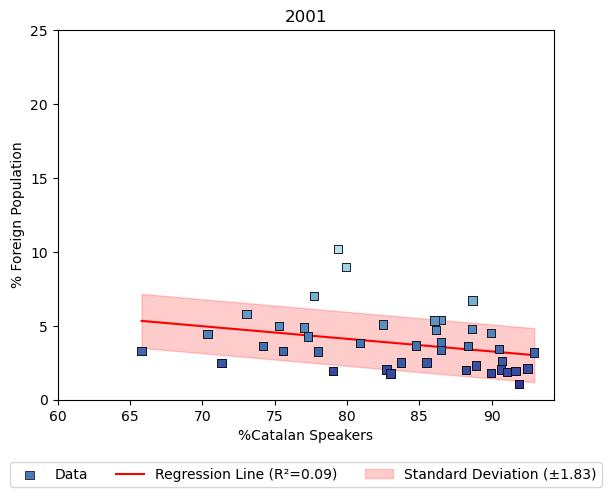

In [28]:
from scipy.stats import linregress
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)

# Compute predicted values from the regression line
y_pred = [slope * xi + intercept for xi in x2]

# Calculate the residuals (difference between observed and predicted y values)
residuals = np.array(y2) - np.array(y_pred)

# Compute the standard deviation of the residuals
std_dev = np.std(residuals)

# Create the regression line for plotting
x_line = np.linspace(min(x2), max(x2), 500)
y_line = slope * x_line + intercept


# Plot the data, regression line, and shaded area for standard deviation
plt.scatter(x2, y2, label='Data',c=y2, cmap='RdYlBu_r', marker='s',zorder=2, edgecolor='black', linewidth=0.5)
plt.plot(x_line, y_line, label=f'Regression Line (R²={r_value**2:.2f})', color='red',zorder=1)

# Plot the standard deviation range (1 standard deviation above and below the regression line)
plt.fill_between(x_line, y_line - std_dev, y_line + std_dev, color='red', alpha=0.2, label=f'Standard Deviation (±{std_dev:.2f})', zorder=0)
plt.scatter(x2, y2, label='',c=y2, cmap='RdYlBu_r',vmin=1,vmax=29, marker='s',zorder=2, edgecolor='black', linewidth=0.5)

# Add labels and title
plt.xlabel('%Catalan Speakers')
plt.ylabel('% Foreign Population')
# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title('2001')
plt.yticks(range(0, 30, 5))
plt.xticks(range(60, 95, 5))
plt.savefig(data_dir+'cor2001.png',bbox_inches='tight',dpi=300, transparent=False)
plt.show()

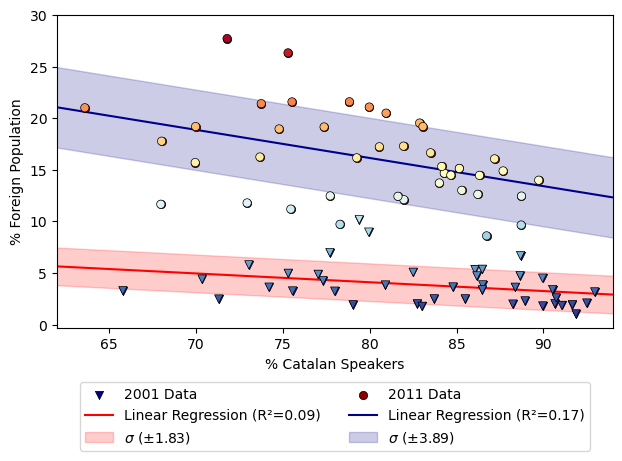

In [29]:
x1=merged_p['% sap parlar']
y1=merged2_p['Població estrangera. % sobre (1)']
x2=merged3_p['% sap parlar']
y2=merged4_p['Població estrangera. % sobre (1)']
from scipy.stats import linregress
# Perform linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, y1)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)
# Compute predicted values from the regression line
y_pred1 = [slope1 * xi1 + intercept1 for xi1 in x1]
y_pred2 = [slope2 * xi2 + intercept2 for xi2 in x2]
# Calculate the residuals (difference between observed and predicted y values)
residuals1 = np.array(y1) - np.array(y_pred1)
residuals2 = np.array(y2) - np.array(y_pred2)
# Compute the standard deviation of the residuals
std_dev1 = np.std(residuals1)
std_dev2 = np.std(residuals2)
# Create the regression line for plotting
x_line1 = np.linspace(60, 95, 500)
y_line1 = slope1 * x_line1 + intercept1
x_line2 = np.linspace(60, 95, 500)
y_line2 = slope2 * x_line2 + intercept2

marker1='o'
marker2='v'
#2001
plt.scatter(x2, y2, label='2001 Data',c='darkblue', marker=marker2,zorder=2, edgecolor='black', linewidth=0.5)
plt.plot(x_line2, y_line2, label=f'Linear Regression (R²={r_value2**2:.2f})', color='red',zorder=1)
plt.fill_between(x_line2, y_line2 - std_dev2, y_line2 + std_dev2, color='red', alpha=0.2, label=f'$\sigma$ (±{std_dev2:.2f})', zorder=0)
plt.scatter(x2, y2, label='',c=y2, cmap='RdYlBu_r',vmin=1,vmax=28, marker=marker2, zorder=2, edgecolor='black', linewidth=0.5)

#2011
# Plot the data, regression line, and shaded area for standard deviation
plt.scatter(x1, y1, label='2011 Data',c='darkred', marker=marker1,zorder=2, edgecolor='black', linewidth=0.5)
plt.plot(x_line1, y_line1, label=f'Linear Regression (R²={r_value1**2:.2f})', color='darkblue',zorder=1)
# Plot the standard deviation range (1 standard deviation above and below the regression line)
plt.fill_between(x_line1, y_line1 - std_dev1, y_line1 + std_dev1, color='darkblue', alpha=0.2, label=f'$\sigma$ (±{std_dev1:.2f})', zorder=0)
plt.scatter(x1, y1, label='',c=y1, cmap='RdYlBu_r',vmin=1,vmax=28, marker=marker1,zorder=2, edgecolor='black', linewidth=0.5)



# Add labels and title
plt.xlabel('% Catalan Speakers')
plt.ylabel('% Foreign Population')
# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
#plt.title('2001')
plt.yticks(range(0, 31, 5))
plt.xticks(range(60, 95, 5))
plt.xlim(62, 94)
plt.tight_layout()
plt.savefig(data_dir+'correlation.png',bbox_inches='tight',dpi=600, transparent=False)
plt.show()

In [30]:
print(f"P-value 2011: {p_value1}")
print(f"Standard error 2011: {std_err1}")
print(f"P-value 2001: {p_value2}")
print(f"Standard error 2001: {std_err2}")

P-value 2011: 0.007389528855343269
Standard error 2011: 0.09655055634892314
P-value 2001: 0.051655647649740274
Standard error 2001: 0.04251233695314618


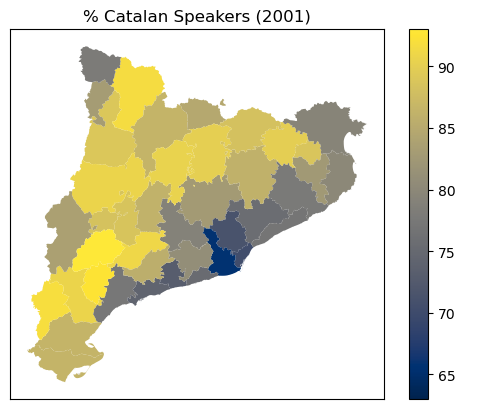

In [31]:
merged3_p.plot(column='% sap parlar',
    cmap='cividis',
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
    vmin=63,
    vmax=93
);
plt.title('% Catalan Speakers (2001)')
plt.xticks([])  
plt.yticks([])
plt.savefig(data_dir+'cat2001.png',bbox_inches='tight',dpi=600, transparent=False)
plt.show()

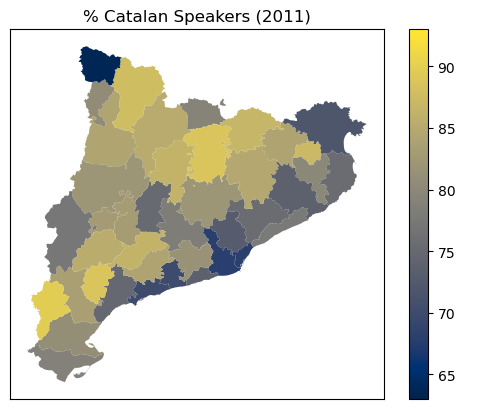

In [32]:
merged_p.plot(column='% sap parlar',
    cmap="cividis",
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
    vmin=63,
    vmax=93
);
plt.title('% Catalan Speakers (2011)')
plt.xticks([])  
plt.yticks([])
plt.savefig(data_dir+'cat2011.png',bbox_inches='tight',dpi=600, transparent=False)
plt.show()

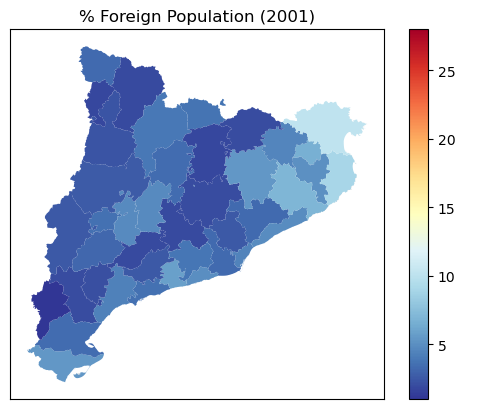

In [33]:
merged4_p.plot(column='Població estrangera. % sobre (1)',
    cmap="RdYlBu_r",
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
    vmin=1,
    vmax=28
);
plt.title('% Foreign Population (2001)')
plt.xticks([])  
plt.yticks([])
plt.savefig(data_dir+'est2001.png',bbox_inches='tight',dpi=600, transparent=False)
plt.show()

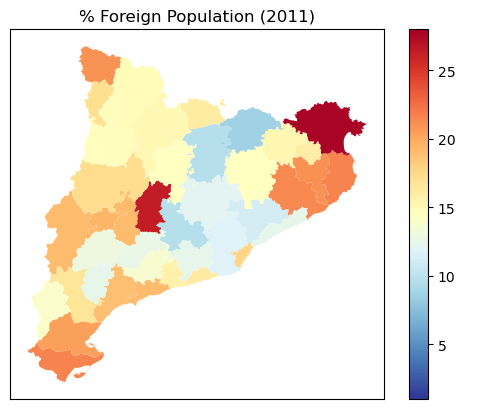

In [34]:
merged2_p.plot(column='Població estrangera. % sobre (1)',
    cmap="RdYlBu_r",
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
    vmin=1,
    vmax=28
);
plt.title('% Foreign Population (2011)')
plt.xticks([])  
plt.yticks([])
plt.savefig(data_dir+'est2011.png',bbox_inches='tight',dpi=600, transparent=False)
plt.show()

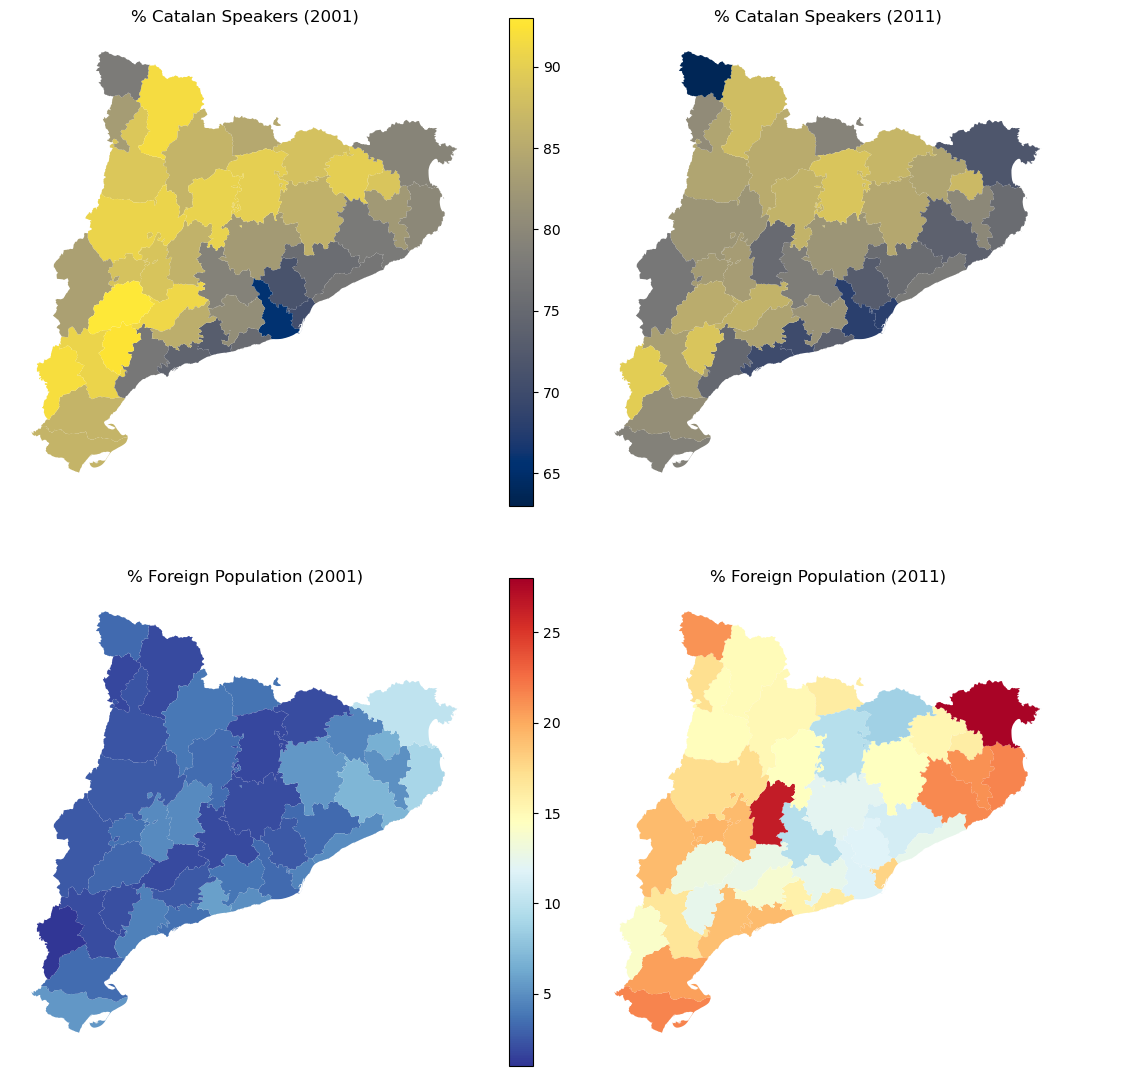

In [35]:
# Create subplots (2 rows, 2 columns)
fig, ax1986 = plt.subplots(2, 2, figsize=(12, 12))

merged_p.plot(column='% sap parlar',#catala2011
    cmap="cividis",
    legend=True,
    ax=ax1986[0, 1],
    legend_kwds={"orientation": "vertical",'shrink': 0.},
    vmin=63,
    vmax=93)

merged2_p.plot(column='Població estrangera. % sobre (1)',#estrangers2011
    cmap="RdYlBu_r",
    legend=True,
    ax=ax1986[1, 1],
    legend_kwds={"orientation": "vertical",'shrink': 0.},
    vmin=1,
    vmax=28)

for colorbar_ax in fig.axes[len(ax1986.flatten()):]:  
    #colorbar_ax.tick_params(size=0, labelsize=0)
    colorbar_ax.tick_params(axis='both', colors='white')
    
merged3_p.plot(column='% sap parlar',#catala2001
    cmap='cividis',
    legend=True,
    ax=ax1986[0, 0], 
    legend_kwds={"orientation": "vertical",'shrink': 0.8 },
    vmin=63,
    vmax=93)

merged4_p.plot(column='Població estrangera. % sobre (1)',#estrangers2001
    cmap="RdYlBu_r",
    legend=True,
    ax=ax1986[1, 0],
    legend_kwds={"orientation": "vertical",'shrink': 0.8},
    vmin=1,
    vmax=28)


ax1986[0,0].axis('off')
ax1986[1,0].axis('off')
ax1986[0,1].axis('off')
ax1986[1,1].axis('off')
ax1986[0,0].set_title('% Catalan Speakers (2001)')
ax1986[0,1].set_title('% Catalan Speakers (2011)')
ax1986[1,0].set_title('% Foreign Population (2001)')
ax1986[1,1].set_title('% Foreign Population (2011)')
plt.tight_layout()



plt.savefig(data_dir+'mapes.png',bbox_inches='tight',dpi=600, transparent=False)
plt.show()



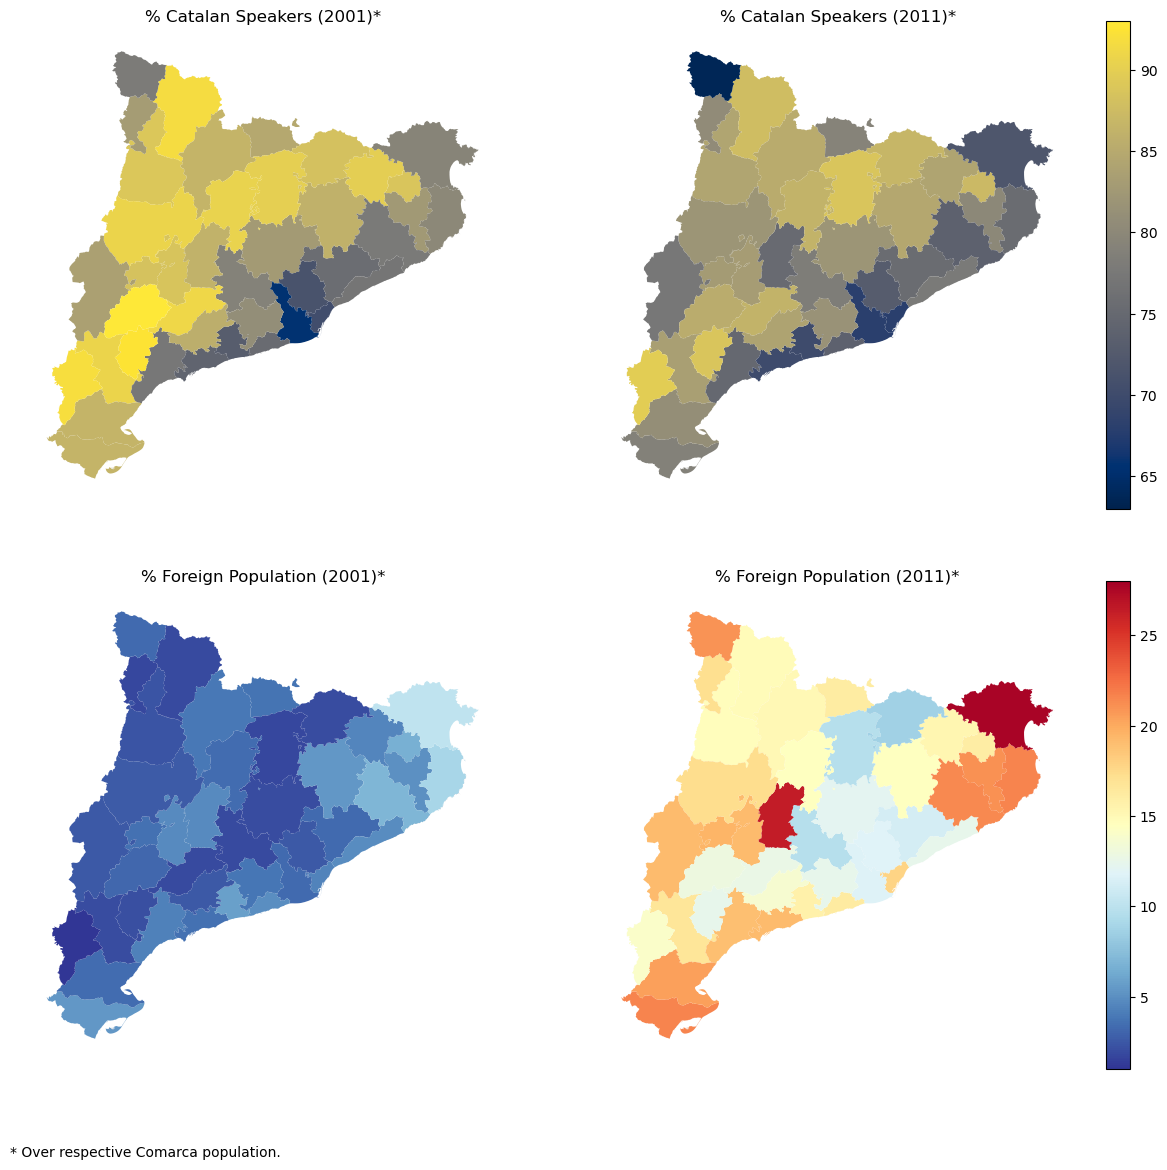

In [36]:
# Create subplots (2 rows, 2 columns)
fig, ax1986 = plt.subplots(2, 2, figsize=(12, 12))
merged3_p.plot(column='% sap parlar',#catala2001
    cmap='cividis',
    legend=True,
    ax=ax1986[0, 0], 
    legend_kwds={"orientation": "vertical",'shrink': 0. },
    vmin=63,
    vmax=93)

merged4_p.plot(column='Població estrangera. % sobre (1)',#estrangers2001
    cmap="RdYlBu_r",
    legend=True,
    ax=ax1986[1, 0],
    legend_kwds={"orientation": "vertical",'shrink': 0.},
    vmin=1,
    vmax=28)

for colorbar_ax in fig.axes[len(ax1986.flatten()):]:  
    #colorbar_ax.tick_params(size=0, labelsize=0)
    colorbar_ax.tick_params(axis='both', colors='white')

merged_p.plot(column='% sap parlar',#catala2011
    cmap="cividis",
    legend=True,
    ax=ax1986[0, 1],
    legend_kwds={"orientation": "vertical",'shrink': 0.8},
    vmin=63,
    vmax=93)

merged2_p.plot(column='Població estrangera. % sobre (1)',#estrangers2011
    cmap="RdYlBu_r",
    legend=True,
    ax=ax1986[1, 1],
    legend_kwds={"orientation": "vertical",'shrink': 0.8},
    vmin=1,
    vmax=28)

ax1986[0,0].axis('off')
ax1986[1,0].axis('off')
ax1986[0,1].axis('off')
ax1986[1,1].axis('off')
ax1986[0,0].set_title('% Catalan Speakers (2001)*')
ax1986[0,1].set_title('% Catalan Speakers (2011)*')
ax1986[1,0].set_title('% Foreign Population (2001)*')
ax1986[1,1].set_title('% Foreign Population (2011)*')
fig.text(0., -0.01, '* Over respective Comarca population.')
plt.tight_layout()



plt.savefig(data_dir+'mapes_v2.png',bbox_inches='tight',dpi=600, transparent=False)
plt.show()